In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [20]:
#a)
#Your code:
import csv
with open('kc_house_data.csv/kc_house_data.csv', 'r') as file:
    house_df = pd.read_csv(file)
print(house_df.head())
#Hint: read_csv(), head()

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [21]:
#b) 

for column in house_df.columns:
    print(column)

house_categorical_df = ["waterfront", "view", "condition", "grade", "zipcode"]
house_numerical_df = ["id", "date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15"]

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


In [22]:
#c)
#Your code:

for column in house_numerical_df:
    print(house_df[column].describe())
    print("\n")

#Hint: Function describe()

count    2.161300e+04
mean     4.580302e+09
std      2.876566e+09
min      1.000102e+06
25%      2.123049e+09
50%      3.904930e+09
75%      7.308900e+09
max      9.900000e+09
Name: id, dtype: float64


count               21613
unique                372
top       20140623T000000
freq                  142
Name: date, dtype: object


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


count    21613.000000
mean      2079.899

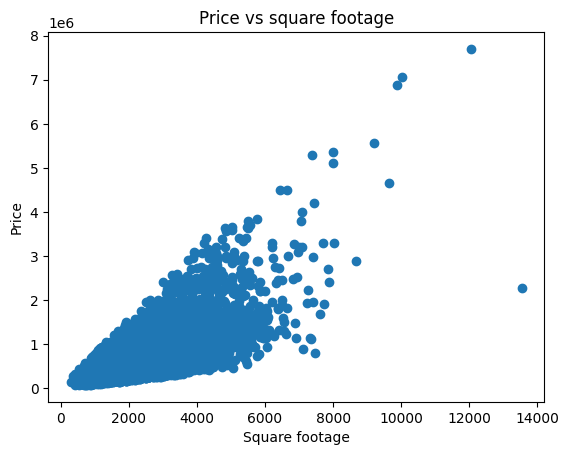

In [23]:
#a)
#Your code:

sq_ft = house_df["sqft_living"] #square footage
price = house_df["price"]
plt.scatter(sq_ft, price)
plt.xlabel("Square footage")
plt.ylabel("Price")
plt.title("Price vs square footage")
plt.show()


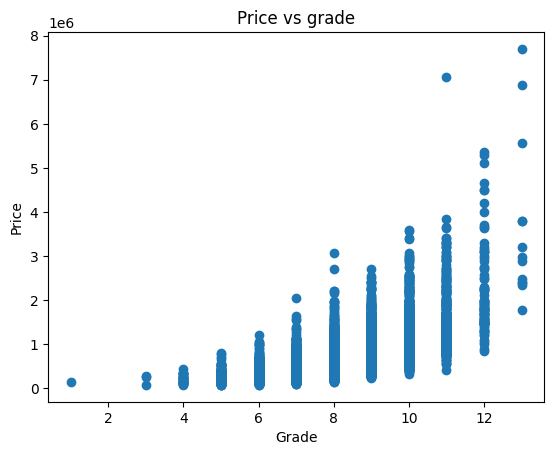

In [24]:
#b)
#Your code:
grade = house_df["grade"]
plt.scatter(grade, price)
plt.xlabel("Grade")
plt.ylabel("Price")
plt.title("Price vs grade")
plt.show()


In [25]:
correlation = grade.corr(price)
print(correlation)

0.6674342560202368


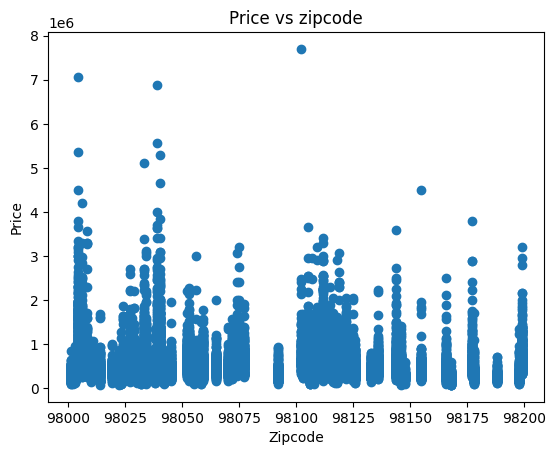

-0.05320285429832562


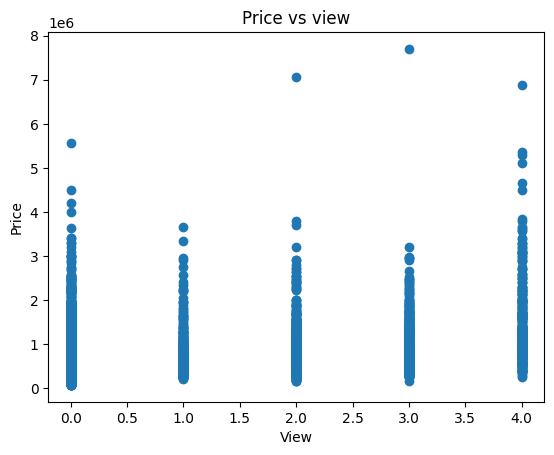

0.3972934882945051


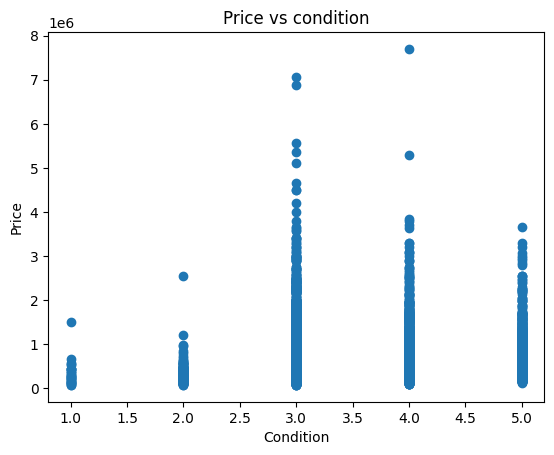

0.036361789128997415


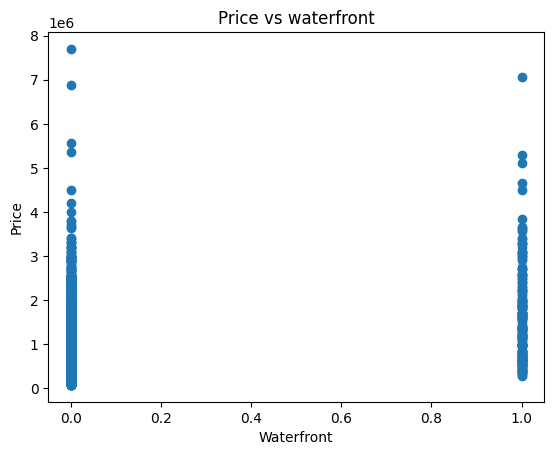

0.26636943403060226


In [26]:
#correlation with zipcode
zipcode = house_df["zipcode"]
plt.scatter(zipcode, price)
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.title("Price vs zipcode")
plt.show()
print(zipcode.corr(price))

#correlation with view
view = house_df["view"]
plt.scatter(view, price)
plt.xlabel("View")
plt.ylabel("Price")
plt.title("Price vs view")
plt.show()
print(view.corr(price))

#correlation with condition
condition = house_df["condition"]
plt.scatter(condition, price)
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title("Price vs condition")
plt.show()
print(condition.corr(price))

#correlation with waterfront
waterfront = house_df["waterfront"]
plt.scatter(waterfront, price)
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.title("Price vs waterfront")
plt.show()
print(waterfront.corr(price))


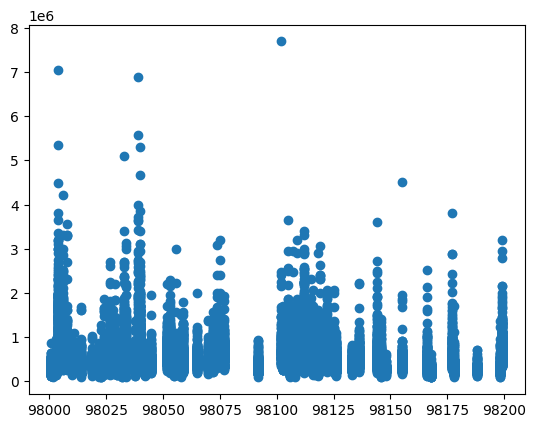

In [27]:
#c)
#Your code:

plt.scatter(zipcode, price)
plt.show()

In [28]:
#Your code:

#In the first place, I will check how the grade column looks like to see what values can be named as good apartments
print(house_df["grade"].describe())

count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64


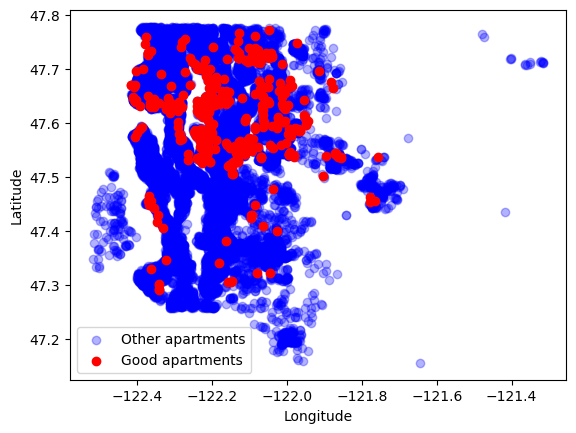

In [29]:
#Your code:
good_grade_threshold = 11

good_apartments = house_df[house_df["grade"] >= good_grade_threshold]
other_apartments = house_df[house_df["grade"] < good_grade_threshold]

plt.scatter(other_apartments["long"], other_apartments["lat"], color='blue', label='Other apartments', alpha=0.3)
plt.scatter(good_apartments["long"], good_apartments["lat"], color='red', label='Good apartments')

plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()
plt.show()

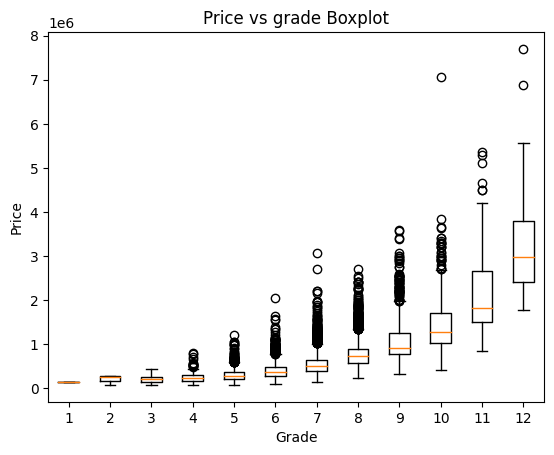

In [30]:
#a)
#Your code:
# Group data by 'grade' and get groups of 'price'
grouped_data = [group["price"].values for name, group in house_df.groupby("grade")]

# Create boxplot
plt.boxplot(grouped_data, labels=house_df["grade"].unique().sort())
plt.xlabel("Grade")
plt.ylabel("Price")
plt.title("Price vs grade Boxplot")
plt.show()
#Hint: plt.boxplot

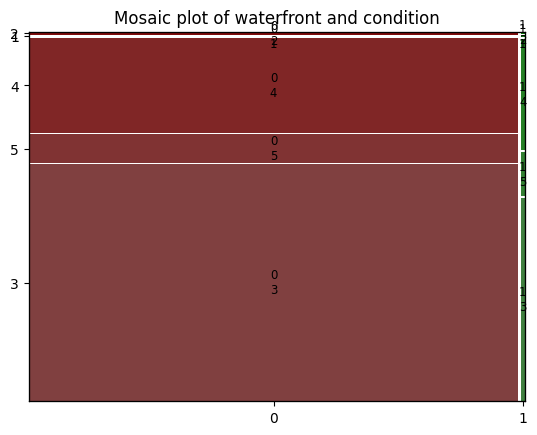

In [31]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
mosaic(house_df, ['waterfront', 'condition'], title='Mosaic plot of waterfront and condition')
plt.show()


## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [32]:
#a)
#Your code:

bedrooms = 3 
bathrooms = 2
floors = 2

filtered_apartments = pd.DataFrame(house_df[(house_df["bedrooms"] == bedrooms) & (house_df["bathrooms"] == bathrooms) & (house_df["floors"] == floors)])

print(filtered_apartments.describe())

#Hint: pandas.DataFrame.loc

                 id         price  bedrooms  bathrooms  sqft_living  \
count  1.540000e+02  1.540000e+02     154.0      154.0   154.000000   
mean   4.397177e+09  5.144986e+05       3.0        2.0  1850.279221   
std    2.849813e+09  2.497661e+05       0.0        0.0   547.585413   
min    7.600057e+06  2.090000e+05       3.0        2.0  1020.000000   
25%    2.060901e+09  3.769750e+05       3.0        2.0  1452.500000   
50%    3.630010e+09  4.640000e+05       3.0        2.0  1700.000000   
75%    7.184074e+09  5.894625e+05       3.0        2.0  2127.500000   
max    9.829200e+09  1.755000e+06       3.0        2.0  3650.000000   

            sqft_lot  floors  waterfront        view   condition       grade  \
count     154.000000   154.0  154.000000  154.000000  154.000000  154.000000   
mean    23678.948052     2.0    0.006494    0.357143    3.435065    7.551948   
std     83324.024708     0.0    0.080582    0.919495    0.713322    0.832684   
min       700.000000     2.0    0.000000

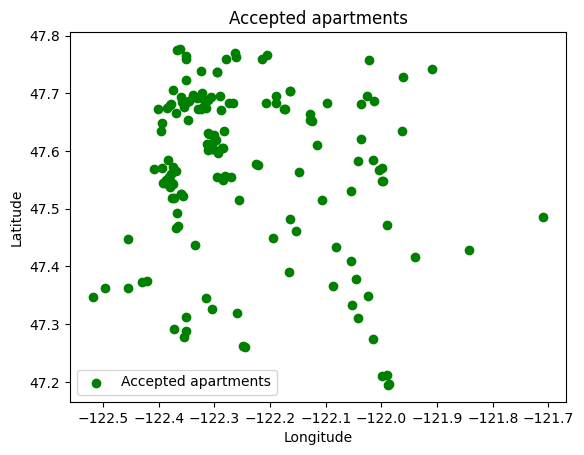

In [33]:
#b)
#Your code:
plt.scatter(filtered_apartments["long"], filtered_apartments["lat"], color='green', label='Accepted apartments')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Accepted apartments")
plt.show()


In [34]:
#c)
#Your code:

filtered_apartments['price_to_footage_ratio'] = filtered_apartments['price'] / filtered_apartments['sqft_living']

filtered_apartments_sorted = filtered_apartments.sort_values(by='price_to_footage_ratio')

print(filtered_apartments_sorted.head(5))

#Hint: .loc, .sort_values(), .index

               id             date     price  bedrooms  bathrooms  \
9704   7452500565  20140829T000000  260000.0         3        2.0   
11258  7937600262  20140710T000000  379900.0         3        2.0   
19880  3832050860  20150319T000000  210000.0         3        2.0   
16014  5104450440  20141113T000000  252500.0         3        2.0   
20906  3355400242  20141028T000000  274900.0         3        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
9704          2710      5000     2.0           0     0  ...        2710   
11258         3110     44967     2.0           0     0  ...        3020   
19880         1580      4961     2.0           0     0  ...        1580   
16014         1810     10684     2.0           0     0  ...        1810   
20906         1936      6612     2.0           0     0  ...        1936   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9704               0      1951             0    98126  47.5